Los Angeles Crime Data Analysis (2020-Present)

**Project Goal:** This notebook explores reported crime incidents in Los Angeles from 2020 up to the most recent data available in the dataset (November 2024, based on initial checks). The primary objective is to perform Exploratory Data Analysis (EDA) to uncover patterns and insights related to crime occurrences.

**Key Areas of Focus:**
* Identifying peak crime times (hourly patterns).
* Determining high-crime geographical areas within Los Angeles.
* Analyzing victim demographics (age groups, sex).
* Understanding the most common types of reported crimes.

**Dataset:**
* The analysis uses the "Crime Data from 2020 to Present" dataset.
* Source: [Link to LA Open Data Portal or specific dataset source page - *Important to add the actual link here*]

**Notebook Structure:**
1.  **Setup and Data Loading:** Importing libraries and loading the dataset.
2.  **Initial Data Inspection and Cleaning:** Examining data types, handling missing values, and formatting columns.
3.  **Exploratory Data Analysis (EDA):** Visualizing distributions and relationships within the data.
4.  **Answering Specific Questions:** Addressing key analytical questions based on the EDA.
5.  **Conclusion:** Summarizing the main findings.


Dataset Source: [(https://www.kaggle.com/datasets/nathaniellybrand/los-angeles-crime-dataset-2020-present)]

## **Setup and Data Loading**

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")


### Data Loading

To ensure data accuracy, I cleaned the dataset by handling missing values as follows:

* Vict Sex and Descent: Dropped rows with missing values, as these are critical and imputation could bias results.
* Weapon Desc: Filled missing values with 'None,' indicating no weapon was used.
* Crime Codes: Filled missing values in 'Crm Cd 1' to 'Crm Cd 4' with 0, as these numerical columns are optional and blank when no additional crimes are reported.
* Cross Street: Filled missing values with 'Not Specified,' as this optional field indicates no cross street was recorded.
* Mocodes: Filled missing values with the mode of 'Mocodes' for each 'Crm Cd' group to maintain context.
* Premise Cd and Desc: Filled missing values with 0 (numerical) for 'Premise Cd' and 'Unknown' (string) for 'Premise Desc' to indicate unspecified premises.

These steps ensure a clean, consistent dataset for analysis without introducing bias.

In [4]:
# Assign the file to the variable filepath
filepath = "Crime_Data_from_2020_to_Present.csv"

try:
    # Load the dataset with date parsing
    crimes = pd.read_csv(filepath, parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str}) #
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{filepath}' was not found.")
    print("Please ensure the dataset is in the correct directory or update the filepath.")
    # Exit or handle error appropriately in a real script
    crimes = None # Set to None if file not found

# To check if loaded successfully and display the first few rows 
if crimes is not None:
    print("First 5 rows of the dataset:")
    display(crimes.head()) 


C:\Users\user\AppData\Local\Temp\ipykernel_6324\633937696.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes = pd.read_csv(filepath, parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str}) #
C:\Users\user\AppData\Local\Temp\ipykernel_6324\633937696.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes = pd.read_csv(filepath, parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str}) #


Dataset loaded successfully.
First 5 rows of the dataset:


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,2020-09-09,2020-09-09,0630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


### Initial Data Inspection and Cleaning


---

In [5]:
# Get basic information about the dataset, including column types and non-null counts.
print("\nDataset Information:")
crimes.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986873 entries, 0 to 986872
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           986873 non-null  int64         
 1   Date Rptd       986873 non-null  datetime64[ns]
 2   DATE OCC        986873 non-null  datetime64[ns]
 3   TIME OCC        986873 non-null  object        
 4   AREA            986873 non-null  int64         
 5   AREA NAME       986873 non-null  object        
 6   Rpt Dist No     986873 non-null  int64         
 7   Part 1-2        986873 non-null  int64         
 8   Crm Cd          986873 non-null  int64         
 9   Crm Cd Desc     986873 non-null  object        
 10  Mocodes         839400 non-null  object        
 11  Vict Age        986873 non-null  int64         
 12  Vict Sex        846266 non-null  object        
 13  Vict Descent    846254 non-null  object        
 14  Premis Cd     

In [6]:
# The 'TIME OCC' column is loaded as a string but not in the right format, so I wrote a function to format it
def format_time(time_str):
    try:
        time_str = str(time_str).zfill(4)
        time_dt = pd.to_datetime(time_str, format='%H%M')
        return time_dt.strftime('%H:%M')
    except (ValueError, TypeError):
        return '00:00'

crimes['TIME OCC'] = crimes['TIME OCC'].apply(format_time)

# Display the updated format 
print("\n'TIME OCC' column formatted:")
display(crimes[['TIME OCC']].head())


'TIME OCC' column formatted:


,TIME OCC
0,21:30
1,18:00
2,17:00
3,20:37
4,06:30


In [7]:
# Check for missing values in each column.
print("\nMissing values before handling:")
display(crimes.isna().sum())


Missing values before handling:


DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           147473
Vict Age               0
Vict Sex          140607
Vict Descent      140619
Premis Cd             16
Premis Desc          582
Weapon Used Cd    661838
Weapon Desc       661838
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          918239
Crm Cd 3          984577
Crm Cd 4          986813
LOCATION               0
Cross Street      834910
LAT                    0
LON                    0
dtype: int64

In [8]:
# Drop rows with missing Status, Vict Sex, or Vict Descent
original_rows = crimes.shape[0]
crimes.dropna(subset=['Status', 'Vict Sex', 'Vict Descent'], inplace=True) # # Combined dropna
print(f"\nDropped {original_rows - crimes.shape[0]} rows with missing Status, Vict Sex, or Vict Descent.")

# Fill missing in both Weapon Desc & Weapon Used Cd with 'NONE'
crimes['Weapon Desc'] = crimes['Weapon Desc'].fillna('NONE')
crimes['Weapon Used Cd'] = crimes['Weapon Used Cd'].mask(crimes['Weapon Desc'] == 'NONE', crimes['Weapon Used Cd'].fillna('NONE'))

# Print result
print("Filled missing 'Weapon Desc' & 'Weapon Used Cd' with 'NONE'")


Dropped 140623 rows with missing Status, Vict Sex, or Vict Descent.
Filled missing 'Weapon Desc' & 'Weapon Used Cd' with 'NONE'


In [9]:
# Fill missing values in Crm Cd columns with 0 (numeric default for no secondary crime)
crimes[['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']] = crimes[['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']].fillna(0)

# Verify the change
print("Filled missing 'Crm Cd' values with 0:")
print(crimes[['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']].isna().sum())

Filled missing 'Crm Cd' values with 0:
Crm Cd 1    0
Crm Cd 2    0
Crm Cd 3    0
Crm Cd 4    0
dtype: int64


In [10]:
# Fill missing values in Cross Street column with Not Specified
crimes['Cross Street']= crimes['Cross Street'].fillna('Not Specified')

# Verify the change
print("Filled missing 'Cross Street' values with 'Not Specified' :")
print(crimes['Cross Street'].isna().sum())

Filled missing 'Cross Street' values with 'Not Specified' :
0


In [11]:
# Define a function to get mode or fallback
def fill_with_mode(series):
    if not series.isna().all():
        return series.fillna(series.mode()[0])
    return series.fillna('default')

# Apply to groups
crimes['Mocodes'] = crimes.groupby('Crm Cd')['Mocodes'].transform(fill_with_mode)

In [12]:
# Fill remaining missing values
crimes['Premis Cd'] = crimes['Premis Cd'].fillna(0)  # Numeric default for unknown location code
crimes['Premis Desc'] = crimes['Premis Desc'].fillna('Unknown')  # Placeholder for unknown location description
print("Filled 1 missing 'Premis Cd' with 0 and 566 missing 'Premis Desc' with 'Unknown'.")
print("Remaining missing values after handling:")
print(crimes.isna().sum())

Filled 1 missing 'Premis Cd' with 0 and 566 missing 'Premis Desc' with 'Unknown'.
Remaining missing values after handling:
DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64


## Exploratory Data Analysis (EDA)

C:\Users\user\AppData\Local\Temp\ipykernel_6324\433174673.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crimes, x=crimes['TIME OCC'].str[:2].sort_values(), palette='viridis')


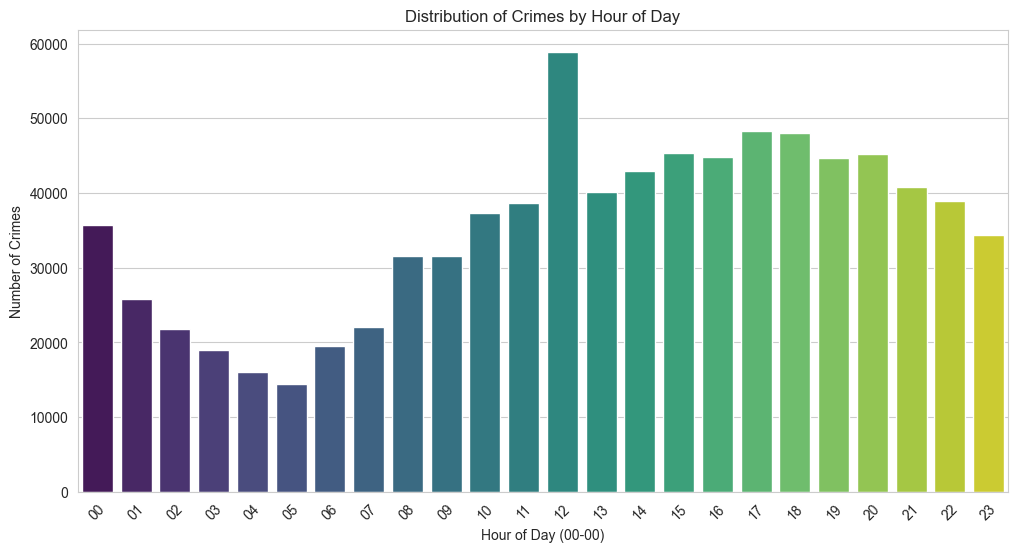

The hour with the most reported crimes is: 12:00


In [ ]:
# **Crime Frequency by Hour**
# Analysis of the distribution of crimes throughout the day.
plt.figure(figsize=(12, 6))
sns.countplot(data=crimes, x=crimes['TIME OCC'].str[:2].sort_values(), palette='viridis')
plt.title('Distribution of Crimes by Hour of Day')
plt.xlabel('Hour of Day (00-00)')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

# Calculate the peak hour numerically
hourly_counts = crimes['TIME OCC'].str[:2].value_counts()
peak_crime_hour_num = hourly_counts.idxmax()
print(f"The hour with the most reported crimes is: {peak_crime_hour_num}:00")


C:\Users\user\AppData\Local\Temp\ipykernel_6324\2287896211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crimes, y='AREA NAME', order=crimes['AREA NAME'].value_counts().index, palette='magma')


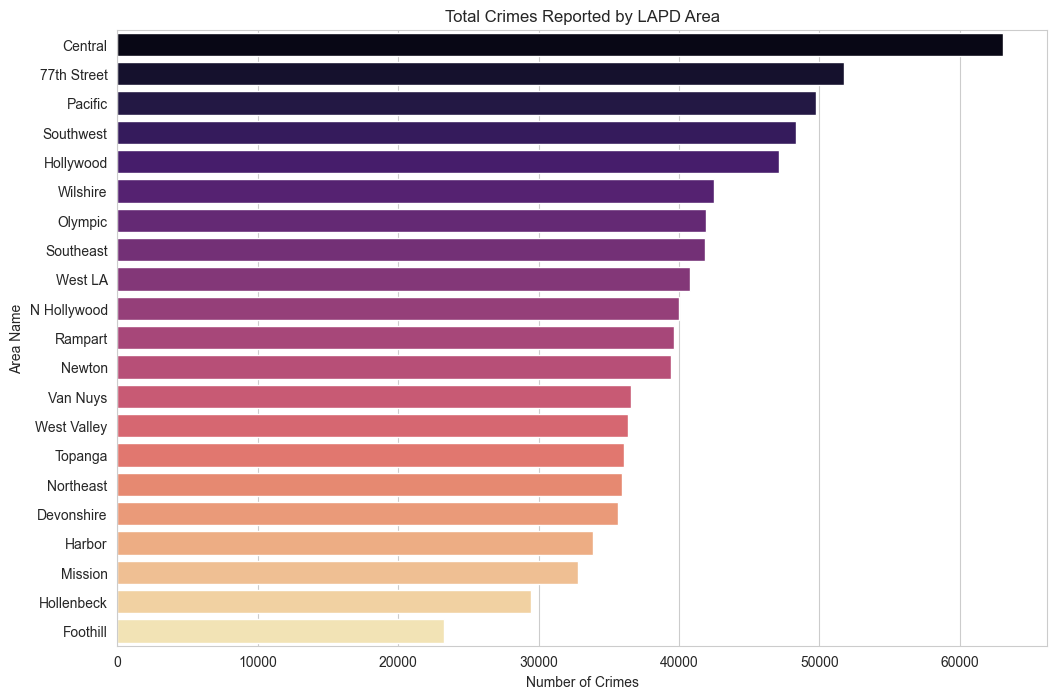

The area with the most reported crimes overall is: Central


In [ ]:
# ** Crime Frequency by Area
# Analysis of which LAPD areas report the most crimes.

plt.figure(figsize=(12, 8))
sns.countplot(data=crimes, y='AREA NAME', order=crimes['AREA NAME'].value_counts().index, palette='magma')
plt.title('Total Crimes Reported by LAPD Area')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.show()

top_area = crimes['AREA NAME'].value_counts().idxmax()
print(f"The area with the most reported crimes overall is: {top_area}")



Number of Crimes by Victim Age Group:
Age Group
0-17      25451
18-25    112334
26-34    182873
35-44    159005
45-54    110606
55-64     78299
65+       54473
Name: count, dtype: int64


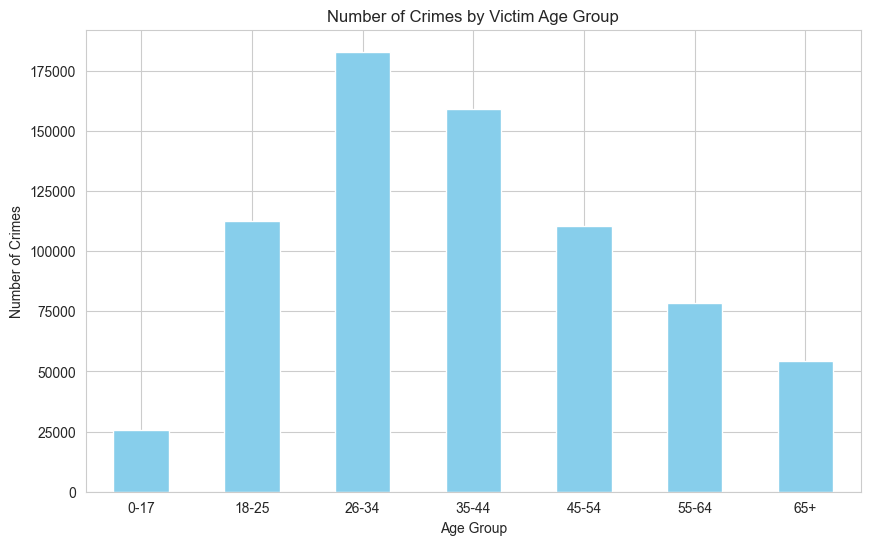

In [15]:
# **Victim Demographics: Age Groups
# Analyze the age distribution of crime victims.

# Define age bins and labels
bins = [0, 17, 25, 34, 44, 54, 64, np.inf] #
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"] #

# Create 'Age Group' column
# Ensure 'Vict Age' > 0, as age 0 often indicates unknown/infant/data entry error
crimes_filtered_age = crimes[crimes['Vict Age'] > 0].copy()
crimes_filtered_age['Age Group'] = pd.cut(crimes_filtered_age['Vict Age'], bins=bins, labels=labels, right=True) #

# Calculate crime counts per age group
victim_ages_series = crimes_filtered_age['Age Group'].value_counts().sort_index() #

print("\nNumber of Crimes by Victim Age Group:")
print(victim_ages_series) #

# Visualize victim age groups
plt.figure(figsize=(10, 6))
victim_ages_series.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes by Victim Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6324\3171845647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=crimes, x='Vict Sex', order=crimes['Vict Sex'].value_counts().index, palette='coolwarm')


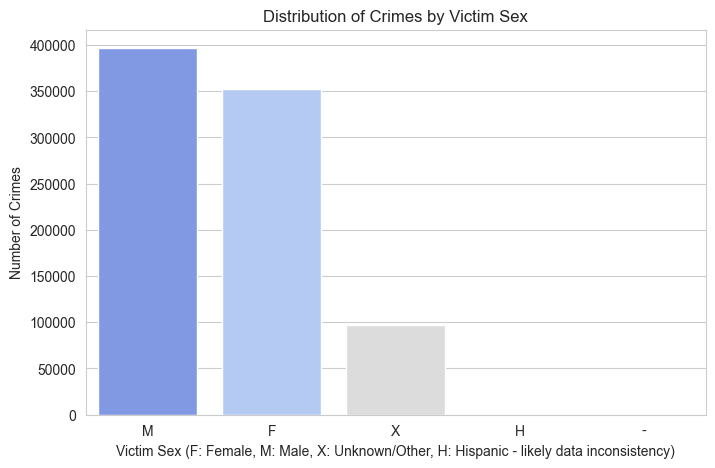

In [16]:
# **Victim Demographics: Sex
# Analyze the distribution of victim sex.

plt.figure(figsize=(8, 5))
sns.countplot(data=crimes, x='Vict Sex', order=crimes['Vict Sex'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Crimes by Victim Sex')
plt.xlabel('Victim Sex (F: Female, M: Male, X: Unknown/Other, H: Hispanic - likely data inconsistency)')
plt.ylabel('Number of Crimes')
plt.show()
# Note: 'X' and 'H' might need further investigation regarding data dictionary/consistency.


C:\Users\user\AppData\Local\Temp\ipykernel_6324\2033645843.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_crimes.index, x=top_crimes.values, palette='rocket', orient='h')


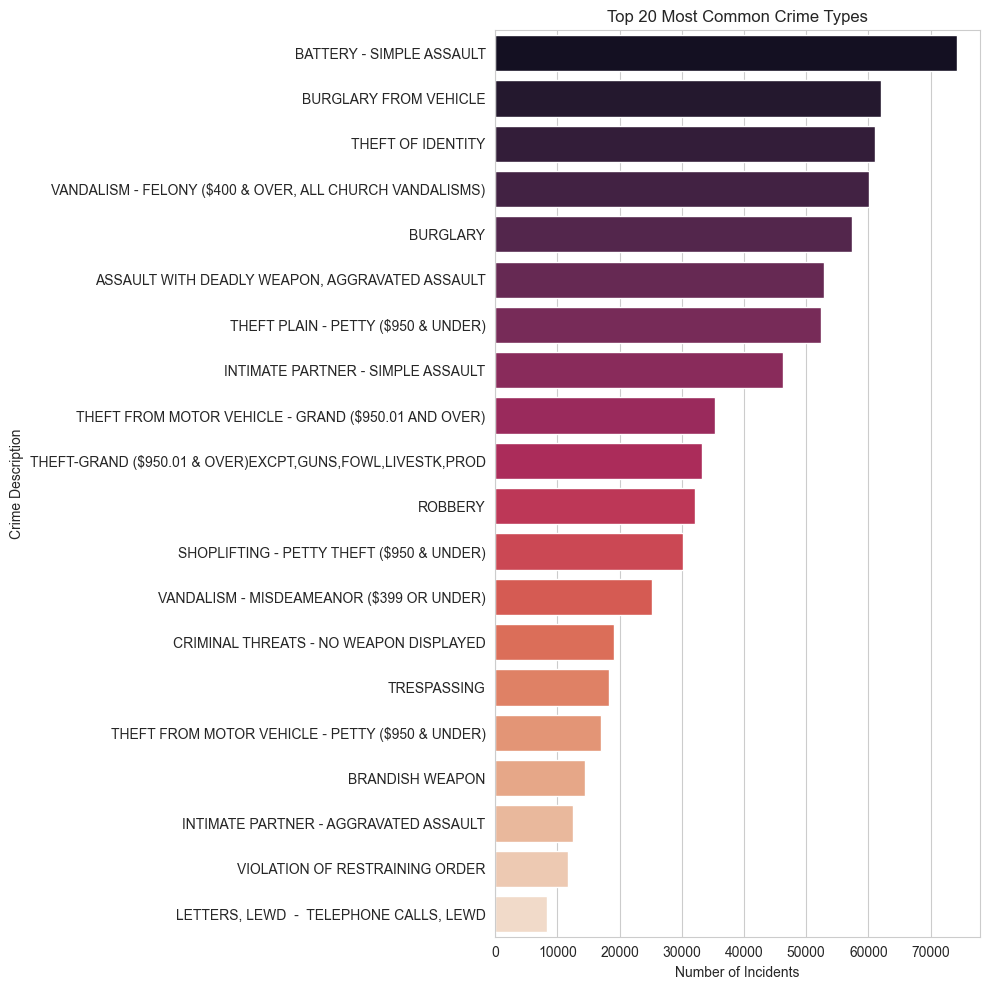

In [17]:
# **Most Common Crime Types**
# Identify the most frequently reported types of crime.

plt.figure(figsize=(10, 10))
top_crimes = crimes['Crm Cd Desc'].value_counts().nlargest(20)
sns.barplot(y=top_crimes.index, x=top_crimes.values, palette='rocket', orient='h')
plt.title('Top 20 Most Common Crime Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Description')
plt.tight_layout()
plt.show()


## Key Insight

In [18]:
# ** Which hour has the highest frequency of crimes?

# This was calculated numerically during EDA

peak_crime_hour_calc = crimes['TIME OCC'].value_counts() # Counts based on HH:MM
peak_crime_hour_str = peak_crime_hour_calc.idxmax() # Gets the HH:MM string
# Storing the hour as an integer (0-23) might be more standard
peak_crime_hour_int = int(peak_crime_hour_str[:2])
if int(peak_crime_hour_str[:2]) == 0:
    peak_crime_hour_int = 24

print(f"\n--- Insight 1 ---")
print(f"The specific time (HH:MM) with the highest frequency of crime reports is {peak_crime_hour_str} with {peak_crime_hour_calc.max()} incidents.") #
print(f"The hour (00-00) with the highest frequency of crime reports is {peak_crime_hour_int}.")



--- Insight 1 ---
The specific time (HH:MM) with the highest frequency of crime reports is 12:00 with 28775 incidents.
The hour (00-00) with the highest frequency of crime reports is 12.



Identified 175606 night-time incidents (22:00 - 03:59).

--- Insight 2 ---
The Area with the largest frequency of night crimes (22:00-03:59) is 'Central' with 13755 incidents.


C:\Users\user\AppData\Local\Temp\ipykernel_6324\1986500548.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=night_crimes, y='AREA NAME', order=peak_night_crime_areas.index, palette='plasma')


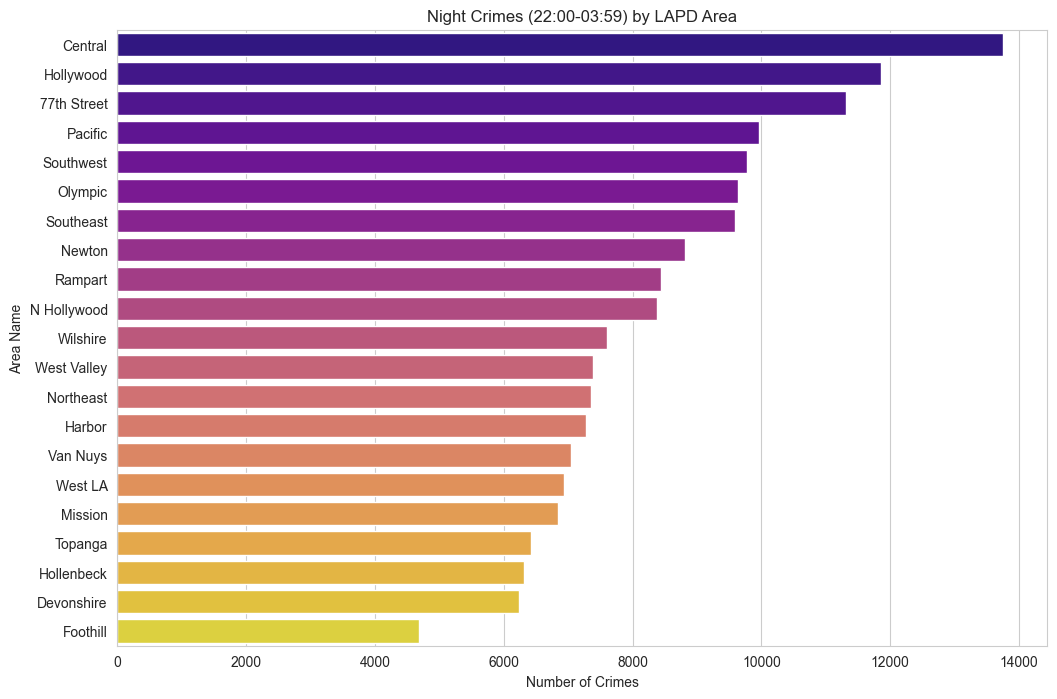

In [19]:
# ** Which area has the largest frequency of night crimes (10 pm to 3:59 am)?**

# Define night time hours (inclusive of 10 PM, exclusive of 4 AM)
# Comparing strings works here for HH:MM format.

night_crimes = crimes[(crimes['TIME OCC'] >= '22:00') | (crimes['TIME OCC'] < '04:00')]
print(f"\nIdentified {night_crimes.shape[0]} night-time incidents (22:00 - 03:59).")

# Find the area with the most night crimes
peak_night_crime_areas = night_crimes['AREA NAME'].value_counts() #
peak_night_crime_location = peak_night_crime_areas.idxmax() #
max_night_crimes = peak_night_crime_areas.max() #

print(f"\n--- Insight 2 ---")
print(f"The Area with the largest frequency of night crimes (22:00-03:59) is '{peak_night_crime_location}' with {max_night_crimes} incidents.") #

# night crimes by area
plt.figure(figsize=(12, 8))
sns.countplot(data=night_crimes, y='AREA NAME', order=peak_night_crime_areas.index, palette='plasma')
plt.title('Night Crimes (22:00-03:59) by LAPD Area')
plt.xlabel('Number of Crimes')
plt.ylabel('Area Name')
plt.show()


In [ ]:
# ** Identify the number of crimes committed against victims of different age groups.**

# This was calculated and stored during EDA in the `victim_ages_series`.
print(f"\n--- Insight 3 ---")
print("Number of crimes committed against victims of different age groups (excluding age 0):")
# The variable victim_ages_series already holds this pandas Series.
print(victim_ages_series) #
# Visualization was shown in the EDA section.


--- Insight 3 ---
Number of crimes committed against victims of different age groups (excluding age 0):
Age Group
0-17      25451
18-25    112334
26-34    182873
35-44    159005
45-54    110606
55-64     78299
65+       54473
Name: count, dtype: int64


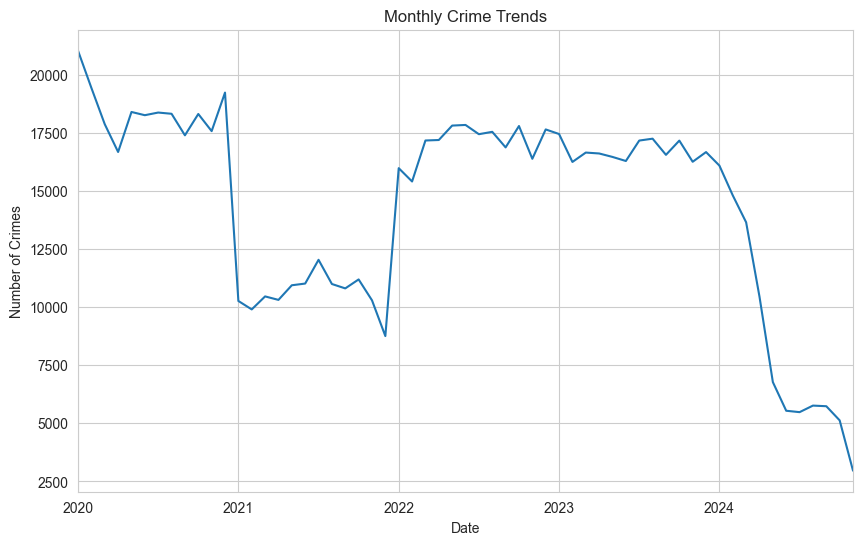

In [32]:
# Time Series Analysis: Analyzing crime trends over months or years to check for seasonal patterns

# Extract year and month from 'DATE OCC'
crimes['YearMonth'] = crimes['DATE OCC'].dt.to_period('M')
# Count crimes per month
monthly_crimes = crimes.groupby('YearMonth').size()

# Visualize Timeseries
plt.figure(figsize=(10, 6))
monthly_crimes.plot()
plt.title('Monthly Crime Trends')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

## Summary and Conclusion
This exploratory data analysis of Los Angeles crime data from 2020 to the present revealed several key patterns and trends:

* **Peak Crime Timing:** Crime incidents occurred most frequently around 12:00 PM (noon).
* **Geographical Hotspots:** The Central area emerged as the area with the highest overall crime reports. It also recorded the most incidents during night hours (10:00 PM to 3:59 AM).
* **Victim Demographics:**
    * The *26-34 age group* represents the most frequently reported victims of crime.
    * Regarding victim sex, *Males (M)* were reported as victims more often than Females (F). The dataset also contained 'X' (Unknown/Other) and 'H' categories; while rows with missing sex data were removed during cleaning, these existing categories were retained and warrant awareness regarding potential data inconsistencies.
* **Prevalent Crime Types:** Among the most common reported incidents were battery-simple assault and vehicle theft, ranking high in the top 20 crime types observed.
* **Temporal Trends:** A review of monthly crime data indicated fluctuations in incident frequency over the period analyzed, suggesting potential seasonal or other time-based variations.

The reliability of these findings is supported by initial data preprocessing steps, which addressed missing values across various critical fields like victim details and weapon information to ensure data consistency for the analysis performed.